In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to images
directory = r"D:\Escritorio\PyCharm files\Machine Learning\Cats vs Dogs Classification"

In [23]:
import os
import shutil
from PIL import Image
from PIL import UnidentifiedImageError

def scan_corrupted_images(directory):
    corrupted_dir = os.path.join(directory, 'corrupted')
    os.makedirs(corrupted_dir, exist_ok=True)
    
    for root, _, files in os.walk(directory):
        # Skip processing the 'corrupted' directory
        if root == corrupted_dir:
            continue
            
        for file in files:
            file_path = os.path.join(root, file)
            try:
                # Verify image integrity
                with Image.open(file_path) as img:
                    img.verify()
                # Check if fully readable
                with Image.open(file_path) as img:
                    img.convert('RGB')
            except (UnidentifiedImageError, OSError, ValueError) as e:
                print(f"Corrupted: {file_path} - {str(e)}")
                # Move corrupted file
                dest = os.path.join(corrupted_dir, os.path.relpath(file_path, directory))
                os.makedirs(os.path.dirname(dest), exist_ok=True)
                shutil.move(file_path, dest)

scan_corrupted_images(directory)

Corrupted: D:\Escritorio\PyCharm files\Machine Learning\Cats vs Dogs Classification\Cat\666.jpg - cannot identify image file 'D:\\Escritorio\\PyCharm files\\Machine Learning\\Cats vs Dogs Classification\\Cat\\666.jpg'
Corrupted: D:\Escritorio\PyCharm files\Machine Learning\Cats vs Dogs Classification\Cat\Thumbs.db - cannot identify image file 'D:\\Escritorio\\PyCharm files\\Machine Learning\\Cats vs Dogs Classification\\Cat\\Thumbs.db'
Corrupted: D:\Escritorio\PyCharm files\Machine Learning\Cats vs Dogs Classification\corrupted\Cat\666.jpg - cannot identify image file 'D:\\Escritorio\\PyCharm files\\Machine Learning\\Cats vs Dogs Classification\\corrupted\\Cat\\666.jpg'
Corrupted: D:\Escritorio\PyCharm files\Machine Learning\Cats vs Dogs Classification\corrupted\Cat\Thumbs.db - cannot identify image file 'D:\\Escritorio\\PyCharm files\\Machine Learning\\Cats vs Dogs Classification\\corrupted\\Cat\\Thumbs.db'
Corrupted: D:\Escritorio\PyCharm files\Machine Learning\Cats vs Dogs Classific

In [25]:
image_size = 100
batch_size = 64

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_dataset = train_datagen.flow_from_directory(
    directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="binary", # Can also be "categorical" for various classes
    subset="training"
)

validation_dataset = train_datagen.flow_from_directory(
    directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

test_dataset = train_datagen.flow_from_directory(
    directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
    subset="validation"
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


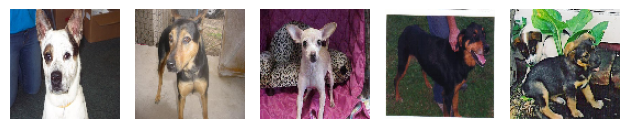

[1. 1. 1. 1. 1.]


In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

imgs, labels = train_dataset[1]
plotImages(imgs)
print(labels[:5])

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Dense, Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Dropout

# Initialize a Sequential network: each new layer will be connected to the last added layer
deep_model = Sequential()

# Start with the Input layer, specifying image dimensions: image_size x image_size x 3 color channels
deep_model.add(Input([image_size, image_size, 3]))

deep_model.add(Convolution2D(32, 3, activation='relu'))
deep_model.add(MaxPooling2D(2))
deep_model.add(Convolution2D(64, 3, activation='relu'))
deep_model.add(MaxPooling2D(2))
deep_model.add(Convolution2D(128, 3, activation='relu'))
deep_model.add(MaxPooling2D(2))
deep_model.add(Flatten())
deep_model.add(Dense(64, activation='relu'))
deep_model.add(Dropout(0.5))
deep_model.add(Dense(1, activation='sigmoid'))

# Compile the neural network
deep_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

# Get the summary of the architecture we just built
deep_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       819,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 912,577 (3.48 MB)

 Trainable params: 912,577 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
deep_model.fit(train_dataset, epochs=10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 243ms/step - accuracy: 0.5429 - loss: 0.6809
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 244ms/step - accuracy: 0.7250 - loss: 0.5500
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 264ms/step - accuracy: 0.7851 - loss: 0.4663
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.8126 - loss: 0.4206
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 255ms/step - accuracy: 0.8424 - loss: 0.3724
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 234ms/step - accuracy: 0.8583 - loss: 0.3318
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 75s 238ms/step - accuracy: 0.8836 - loss: 0.2799
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 233ms/step - accuracy: 0.8939 - loss: 0.2508
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 248ms/step - accuracy: 0.9106 - loss: 0.2197
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 257ms/step - accuracy: 0.9233 - loss: 0.1893


In [32]:
loss, acc = deep_model.evaluate(test_dataset)
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.8540 - loss: 0.3853
Loss 0.338, accuracy 87.0%
